# Sodikov Farkhod, PI19-1, Spanning tree.

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import random

# Input data:                                                                                                  

1. Connected graph with at least 50 vertices.                                                                
2. Edge weights range from 1 to 10 randomly.                                                          

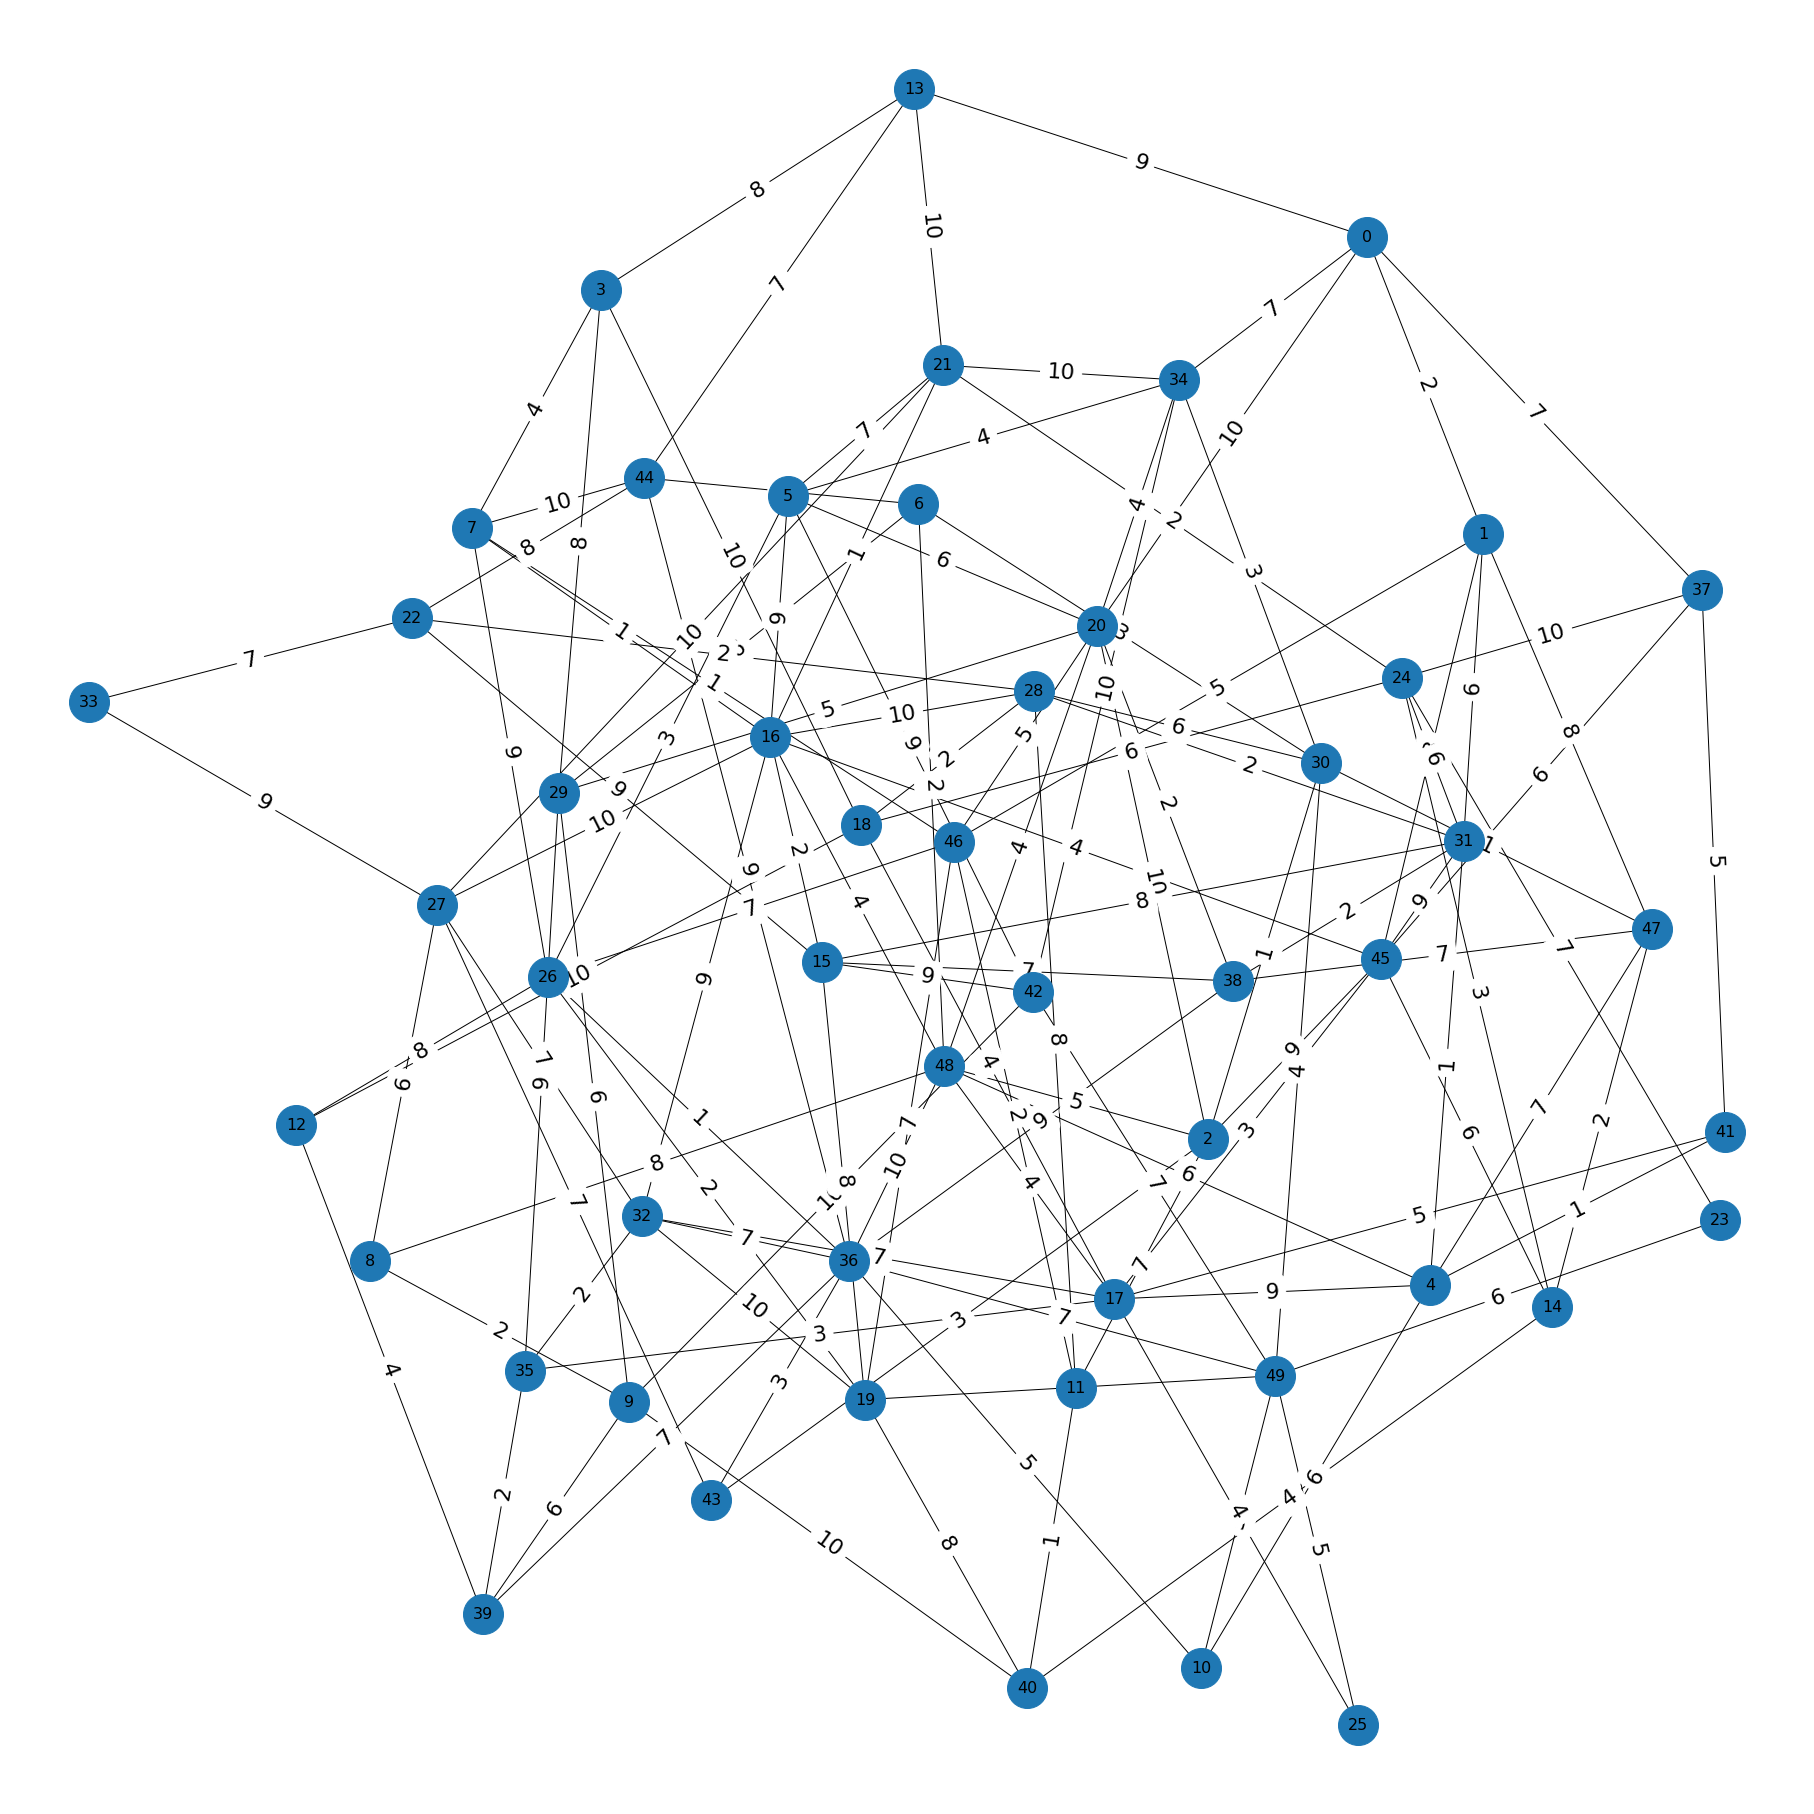

In [4]:
G = nx.Graph()
n = 50
nodes = [str(i) for i in range(n)]
for i in nodes:
    times = random.randint(2,3)
    while times != 0:
        goal = random.choice(nodes)
        if ((i, goal) not in G.edges or (goal, i) not in G.edges) and goal != i:
            weight = random.randint(1, 10)
            G.add_edge(i, goal, width = weight)
            times -= 1
            
def g_draw(G = nx.Graph(), with_edge_labels = False):
    plt.figure(1, (25, 25))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos = pos, with_labels = True, node_size = 1600, font_size = 16)
    if with_edge_labels:
        widths = {e: G[e[0]][e[1]]['width'] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = widths, font_size = 22)
    plt.show()
g_draw(G, with_edge_labels = True)

# Task №1:                                                                                                  

1. Construct a minimum weight spanning tree on a graph using Kruskal's algorithm.     

2. Visualize the solution. 

In [5]:
def take_tree_len(G, tree_edges):
    length = 0
    for e in tree_edges:
        length += G[e[0]][e[1]]['width']
    return length, len(tree_edges)

def change_edges(G, minimum = 1, maximum = 3):
    edges = list(G.edges)
    for i in range(5):
        edge = random.choice(edges)
        G[edge[0]][edge[1]]['width'] = random.randint(minimum, maximum)
    return G

def take_tree(G=nx.Graph()):
    edges_data = {e: G[e[0]][e[1]]['width'] for e in G.edges}
    edges = sorted(edges_data.keys(), key=lambda x: edges_data[x])
    tree_edges = []
    visited_nodes = []
    groups = {}
    p = []
    for e in edges:
        if e[0] not in visited_nodes or e[1] not in visited_nodes:
            if e[0] not in visited_nodes and e[1] not in visited_nodes:
                groups[e[0]] = [e[0], e[1]]
                groups[e[1]] = groups[e[0]]
                p.append(groups[e[0]])
            elif e[1] in visited_nodes:
                groups[e[1]].append(e[0])
                groups[e[0]] = groups[e[1]] 
            else:
                groups[e[0]].append(e[1])
                groups[e[1]] = groups[e[0]]
            tree_edges.append(e)
            visited_nodes = list(set(visited_nodes + [e[0], e[1]]))
    for e in edges:
        if e[1] not in groups[e[0]]:
            tree_edges.append(e)
            temp = groups[e[0]] + groups[e[1]]
            groups[e[0]] = temp
            for i in temp:
                groups[i] = groups[e[0]]
            
    return tree_edges

def tree_draw(G=nx.Graph(), tree_edges=[], with_edge_labels=False):
    plt.figure(1, (30, 30))
    G_new = nx.Graph()
    pos = nx.kamada_kawai_layout(G)
    colors = []
    for e in G.edges:
        if e in tree_edges:
            colors.append('green')
        else:
            colors.append('red')
    nx.draw(G, pos=pos, with_labels = True, edge_color = colors, width = 5, node_size = 2000, font_size=22)
    if with_edge_labels:
        widths = {e: G[e[0]][e[1]]['width'] for e in G.edges} 
        nx.draw_networkx_edge_labels(G, pos = pos, edge_labels = widths, font_size = 22)
    plt.show()

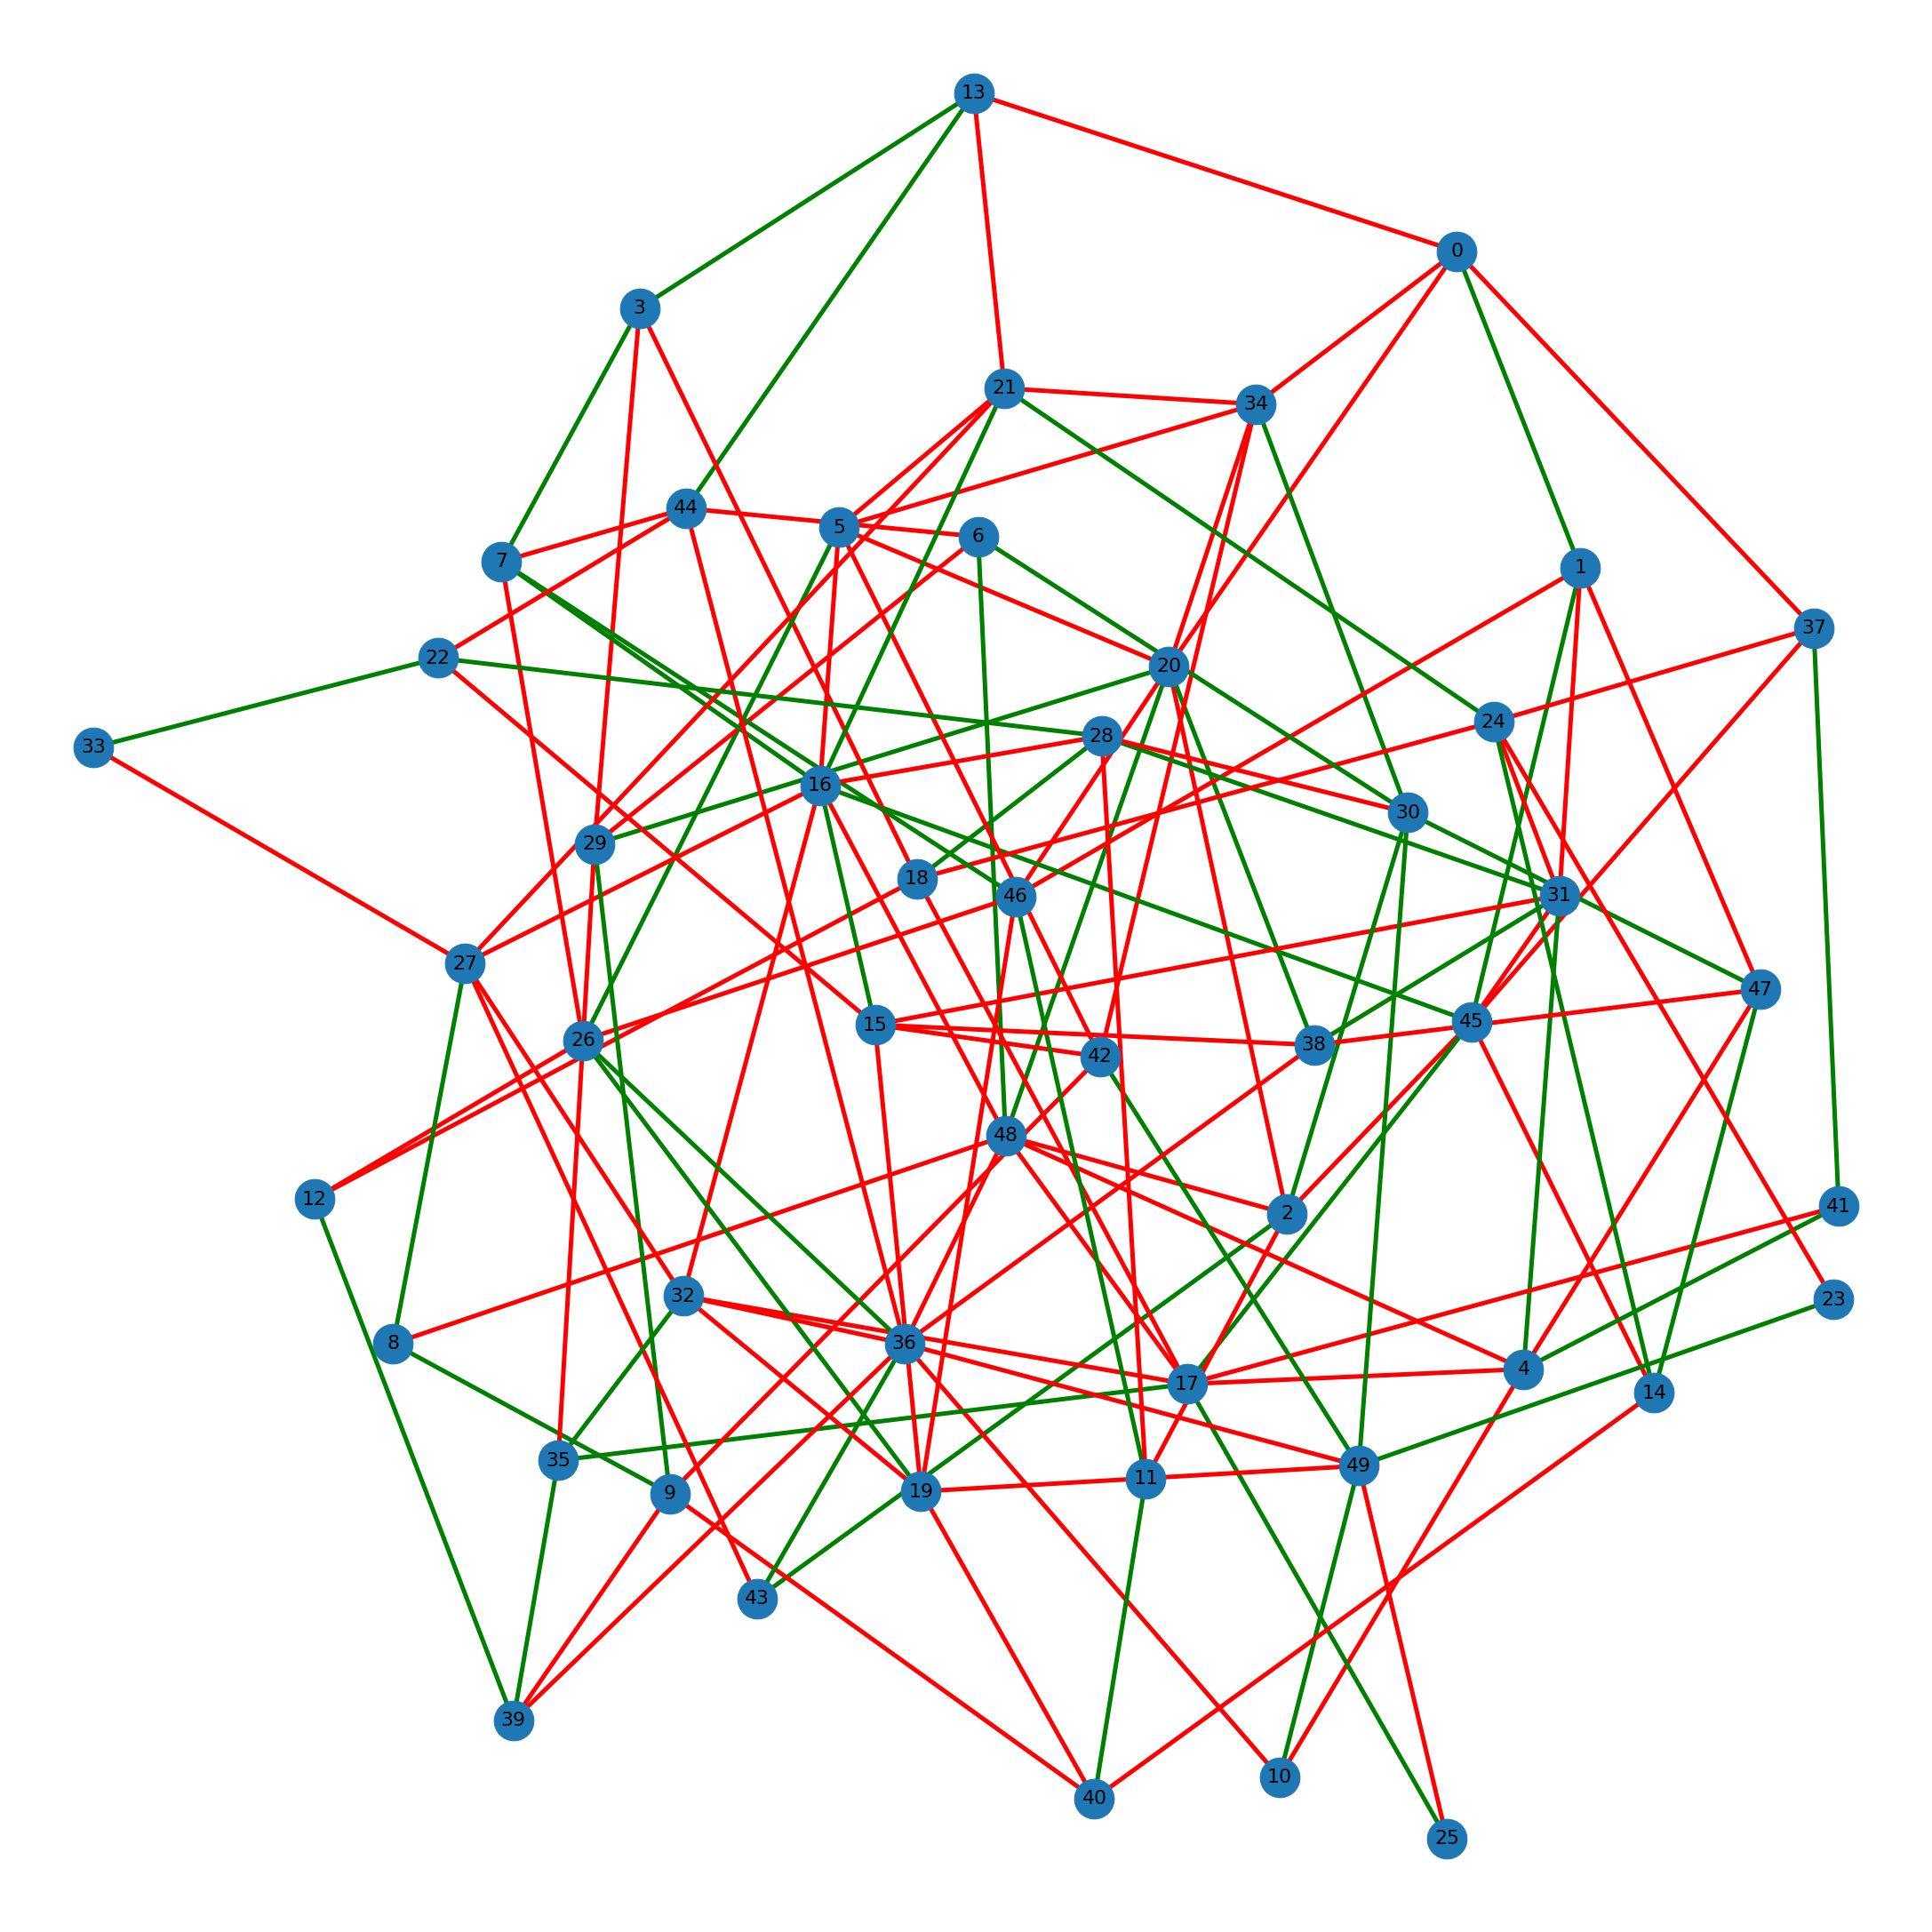

Spanning tree weight:  152
Number of edges in a spanning tree:  49


In [6]:
tree_edges = take_tree(G)
tree_draw(G = G, tree_edges = tree_edges)

length, count = take_tree_len(G, tree_edges)
print('Spanning tree weight: ',length)
print('Number of edges in a spanning tree: ',count)

# Task №2:                                                                                                  

1. Select 5 graph edges randomly and change their weights in the range from 1 to 3. Construct a minimum weight spanning tree. Check how quantitatively and structurally the solution has changed.                                                                
2. Visualize the decision change.                                                         

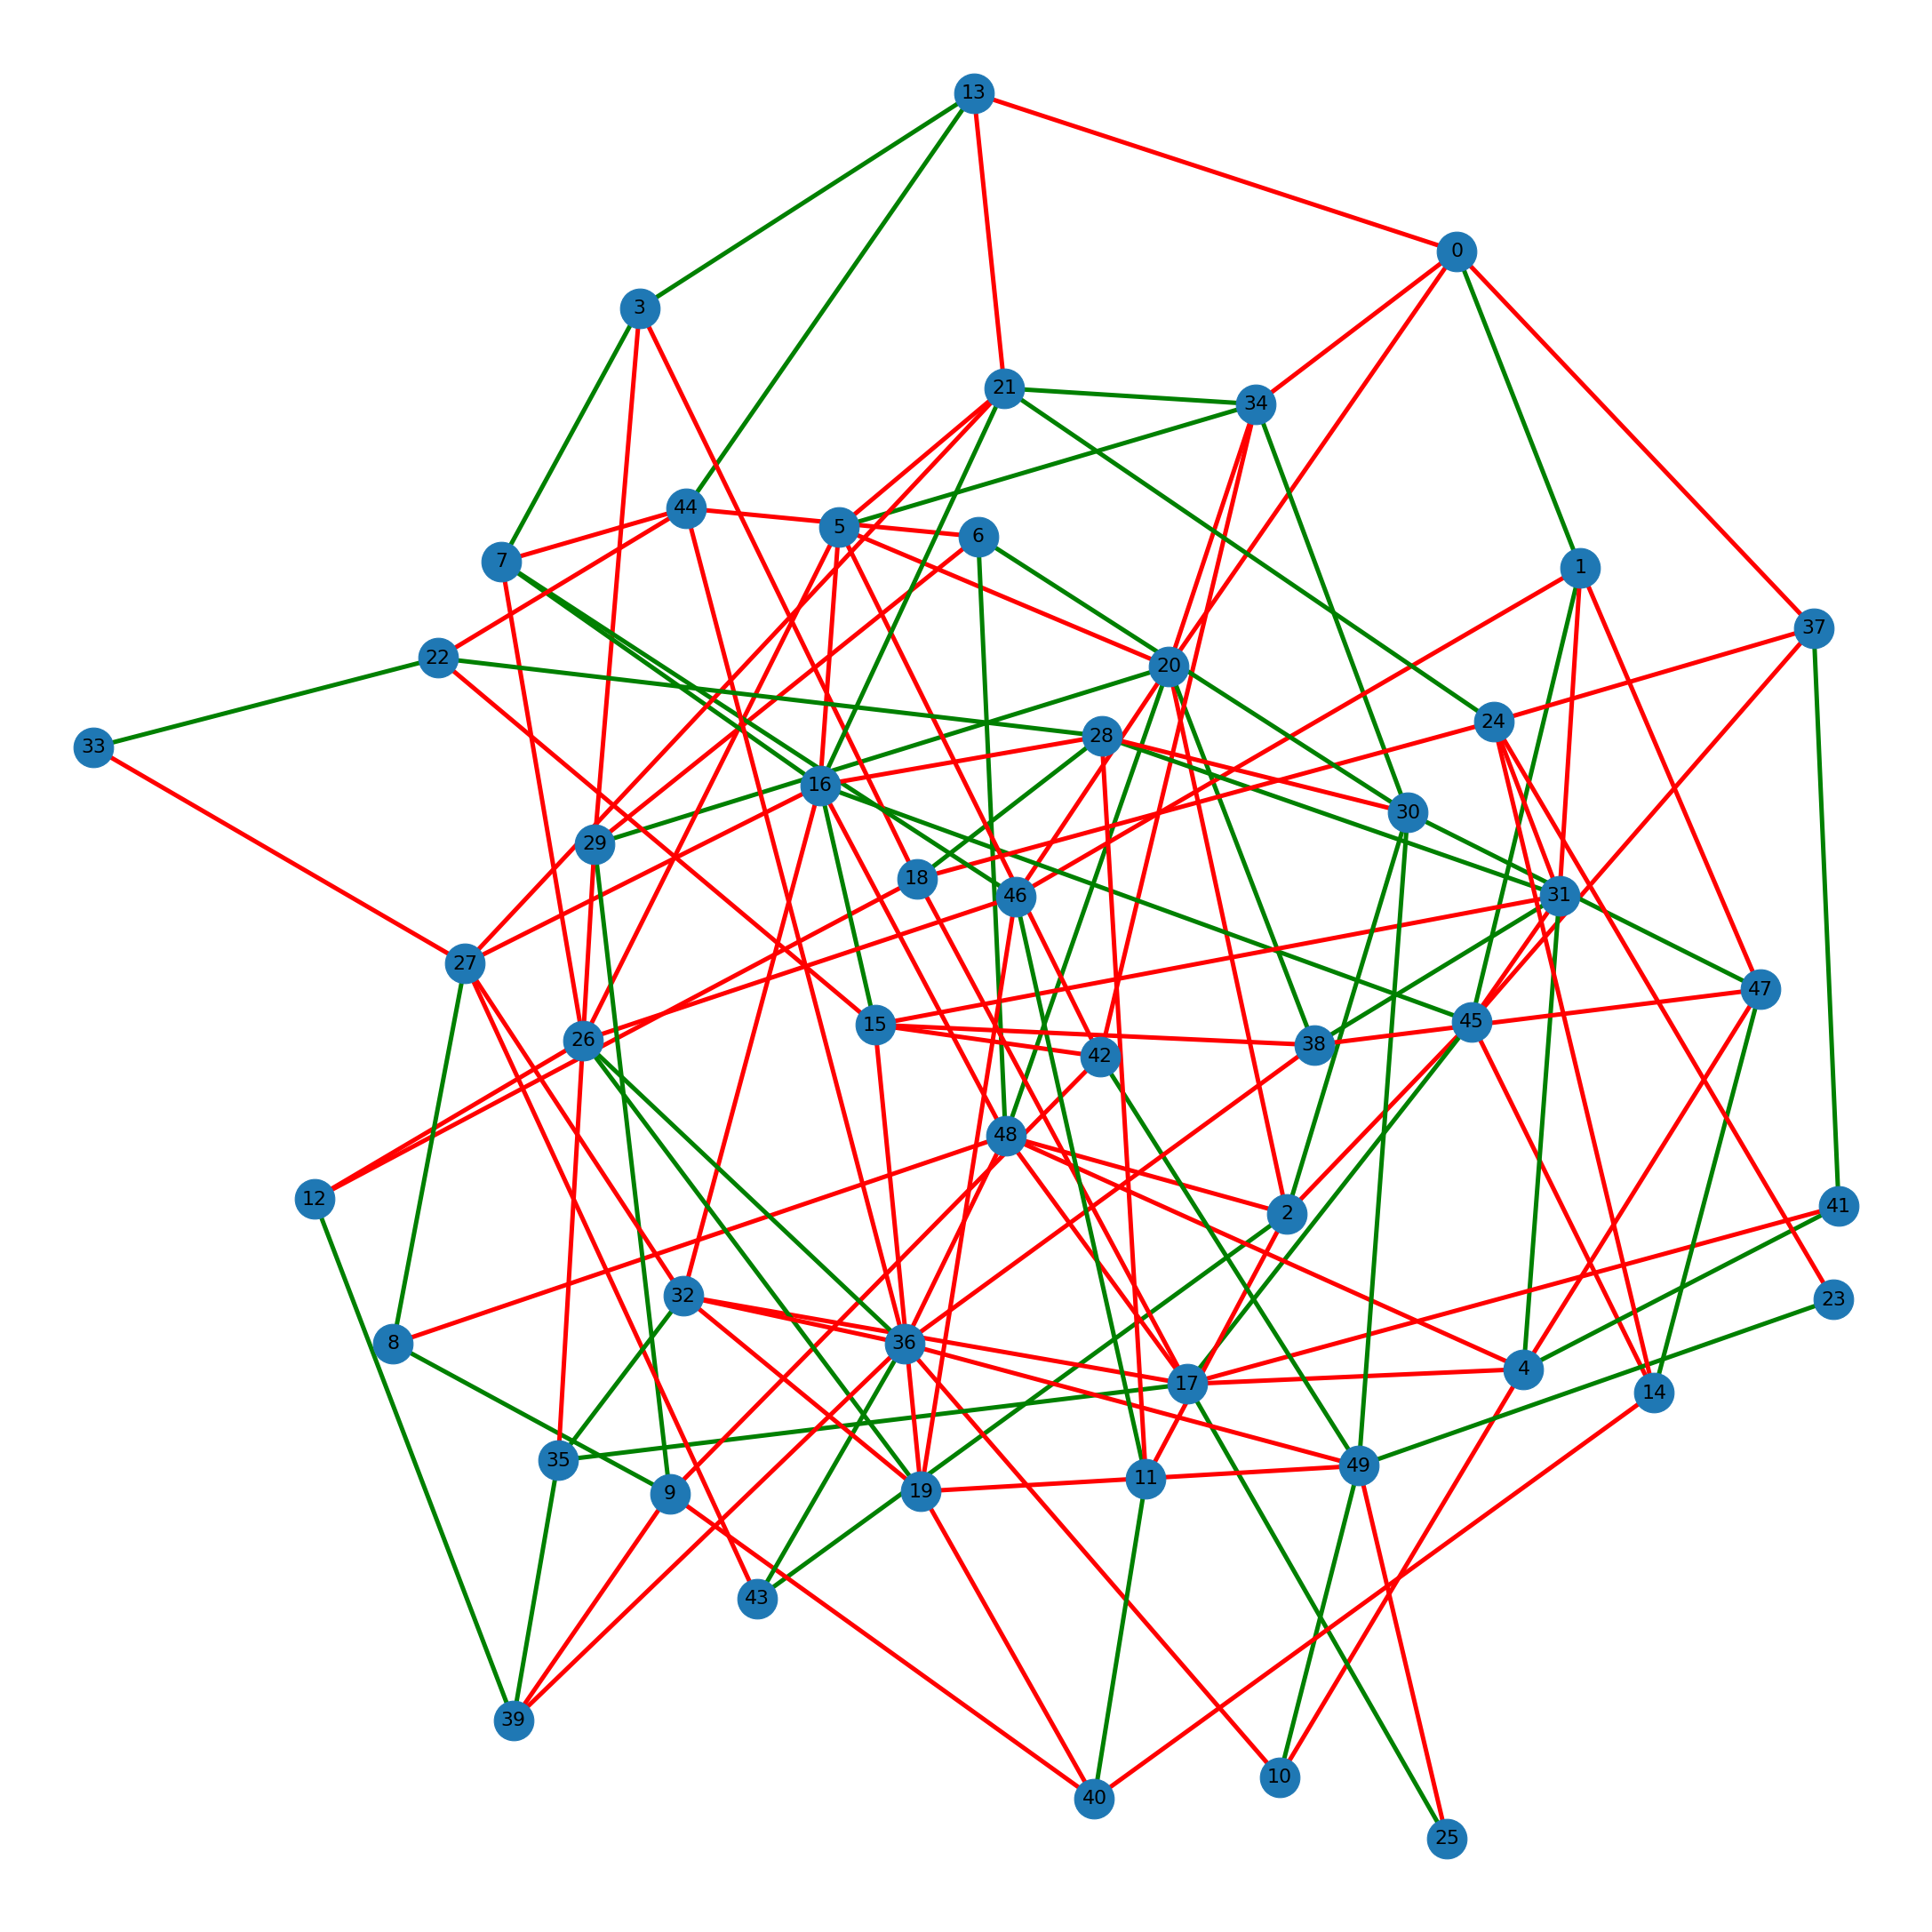

Spanning tree weight:  149
Number of edges in a spanning tree:  49


In [7]:
task2 = change_edges(G)
tree_edges_2 = take_tree(task2)
tree_draw(task2, tree_edges = tree_edges_2)

length2, count2 = take_tree_len(task2, tree_edges_2)
print('Spanning tree weight: ',length2)
print('Number of edges in a spanning tree: ',count2)

# Task №3:                                                                                                  

1. Carry out 30 iterations of task 2.                                                                 
2. Construct a graph of change in quantitative and structural change.                                                       

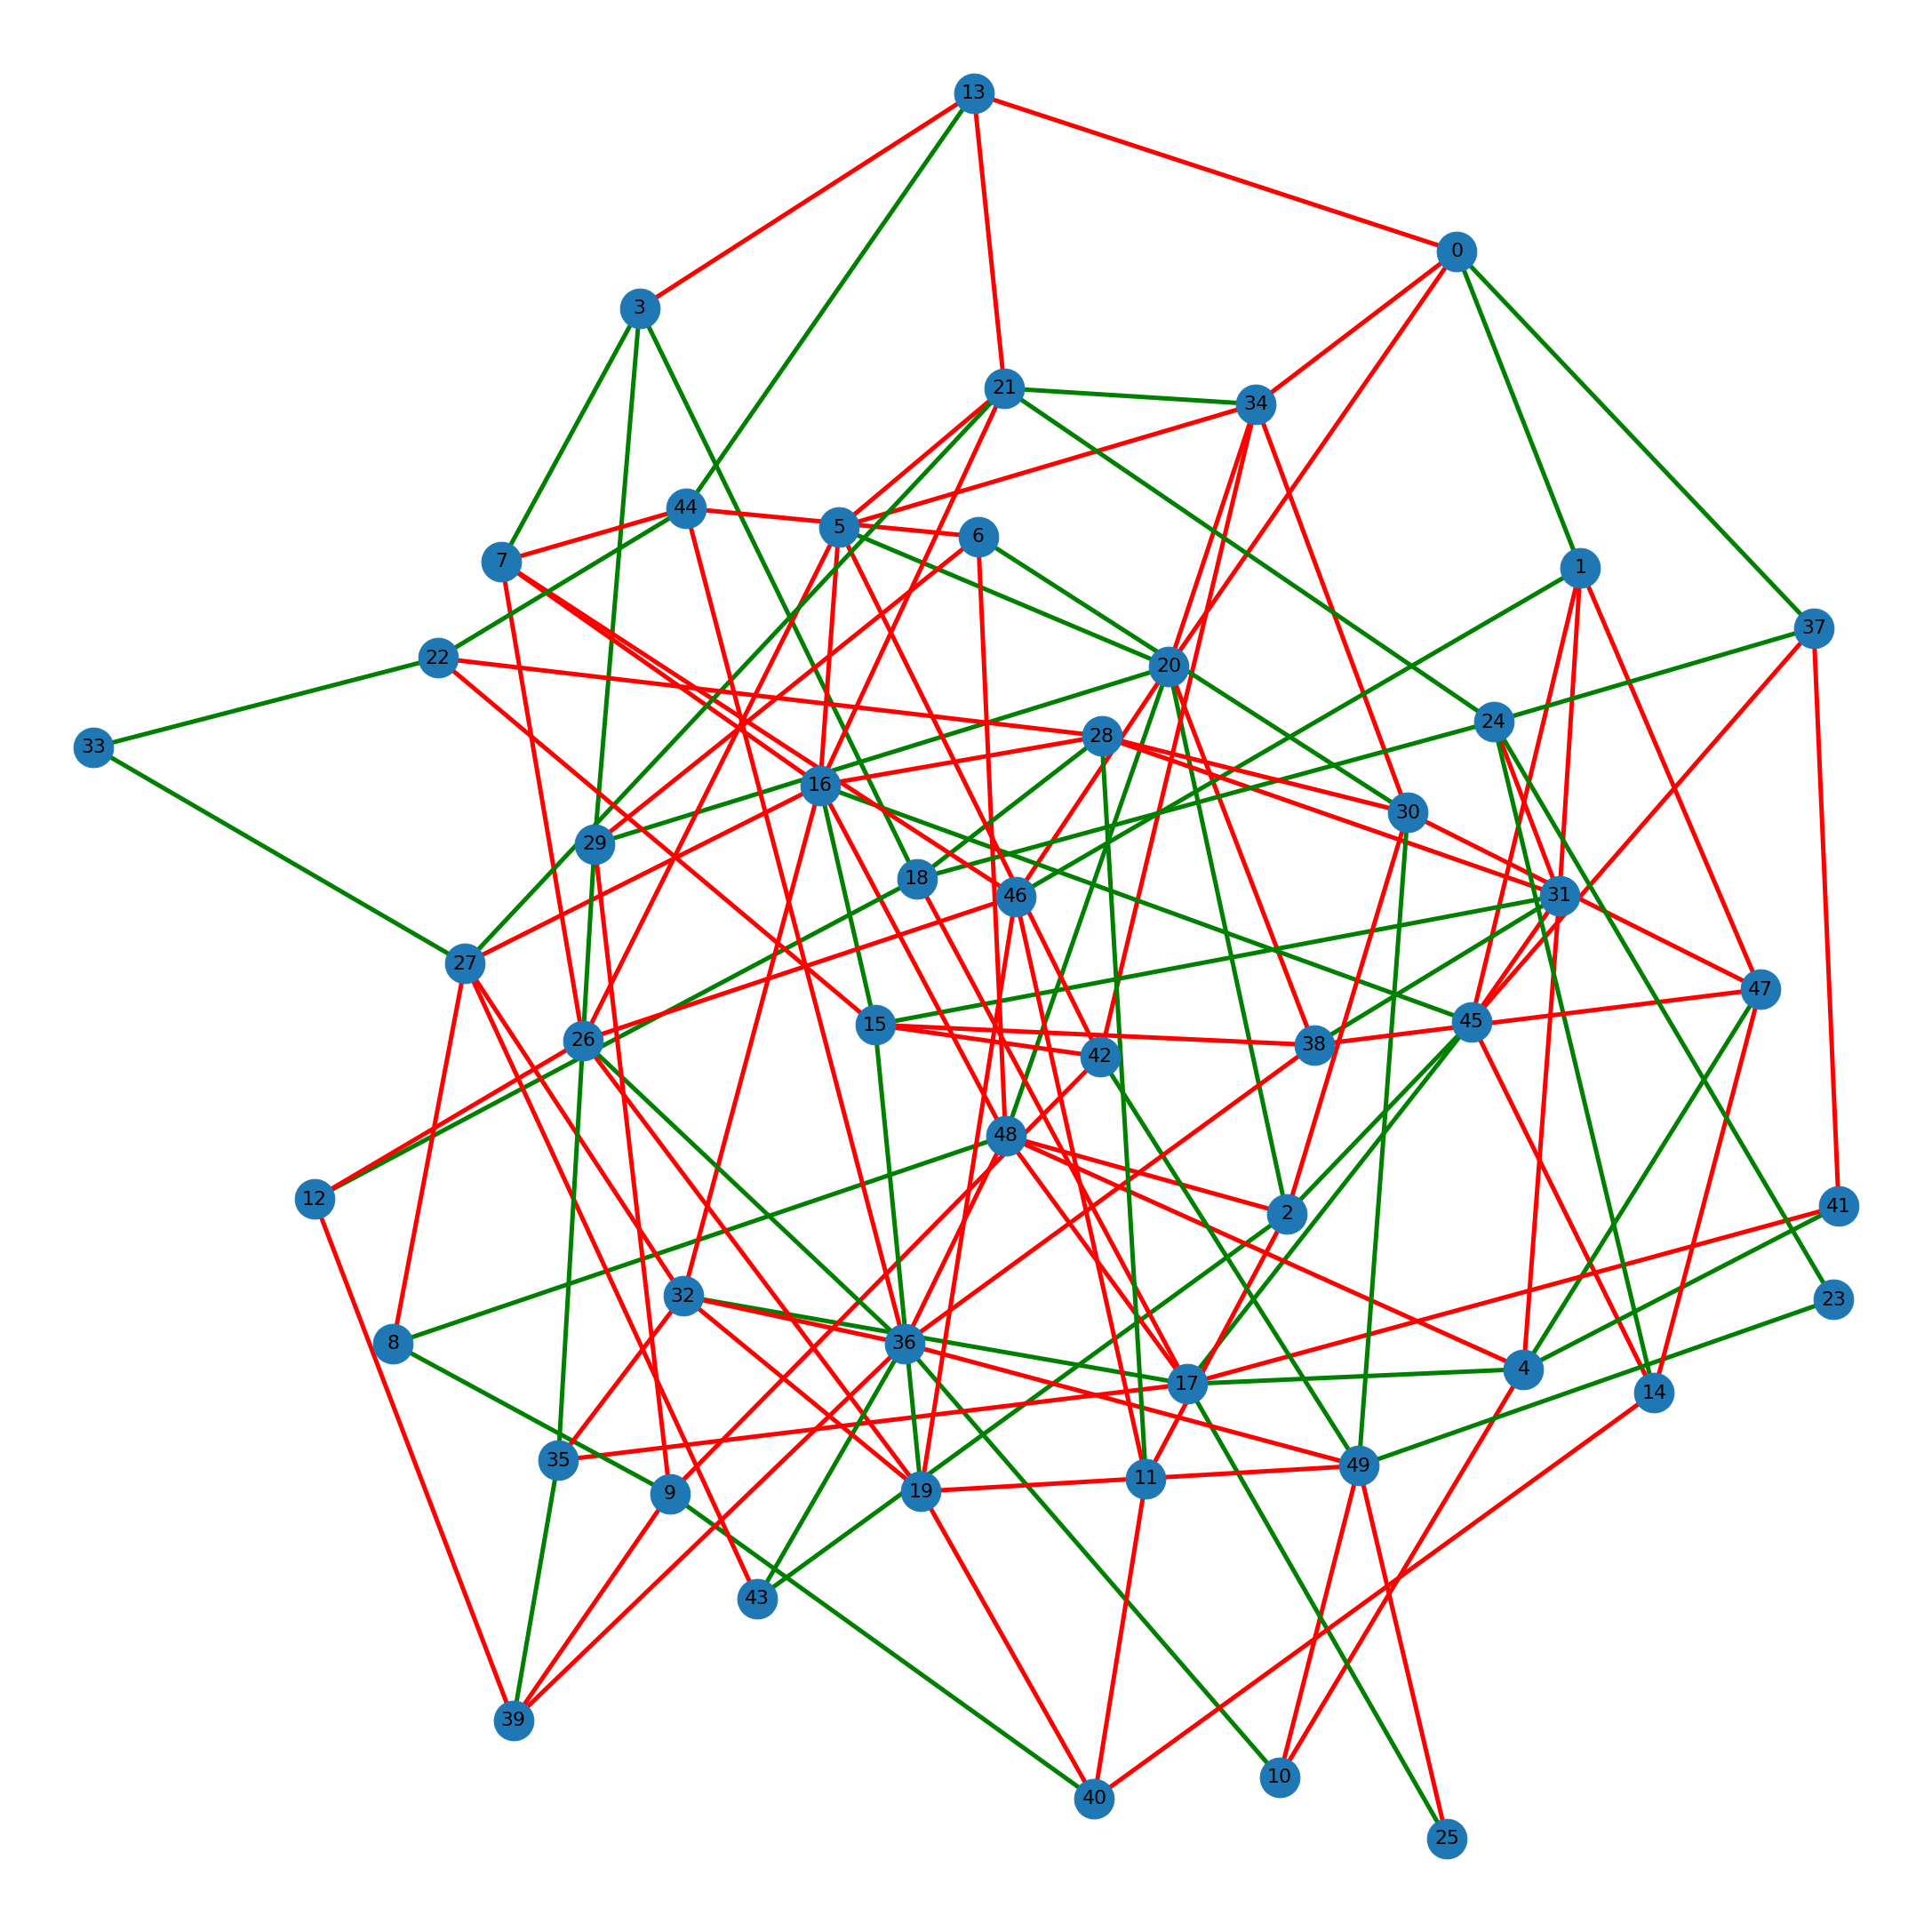

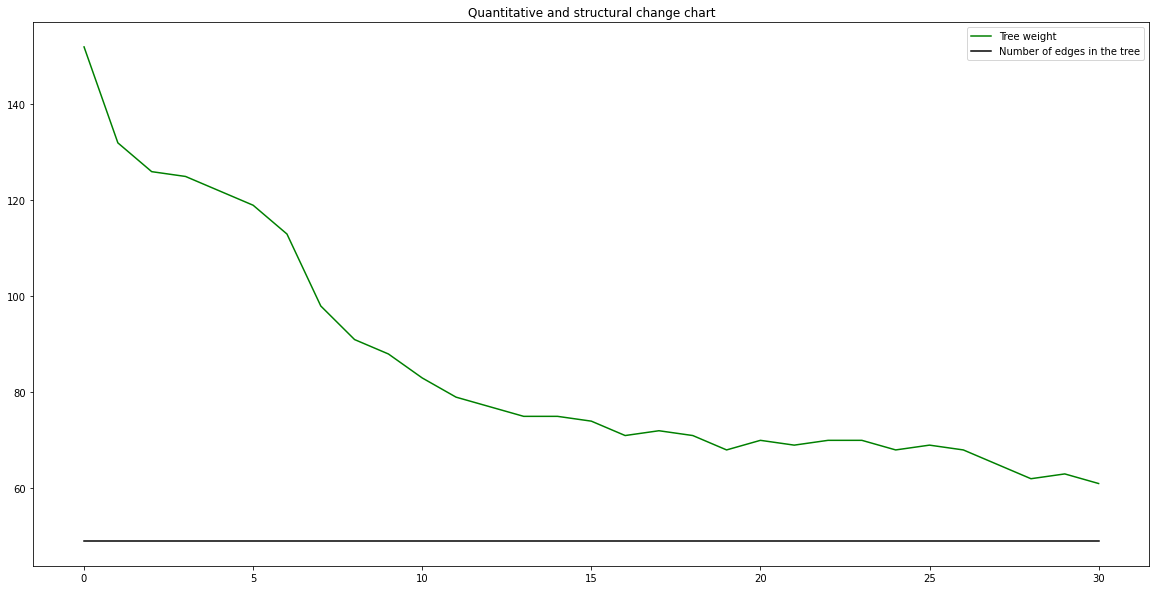

In [13]:
length_list = [length]
count_list = [count]
task3 = G
for i in range(30):
    task3 = change_edges(task3)
    tree = take_tree(task3)
    l, c = take_tree_len(task3, tree)
    length_list.append(l)
    count_list.append(c)
tree_draw(task3, tree_edges = tree)

plt.figure(1, (20, 10))
plt.plot(length_list, label = 'Tree weight', color = "green")
plt.plot(count_list, label = 'Number of edges in the tree', color = 'black')
plt.title('Quantitative and structural change chart')
plt.legend()
plt.show()

As a result of the program, you can see that the number of edges has not changed. The total weight decreases, but if you increase the weights of the ribs, then it can increase. This happens at the end when most of it is in the range from 1 to 3.

# Task №4:                                                                                                  

1. Solve Problem №3 by changing the range of weights. Those. replacing the range from 1 to 3 with another one.                                                                  
2. Compare (analyze) the results with task №3.                                                       

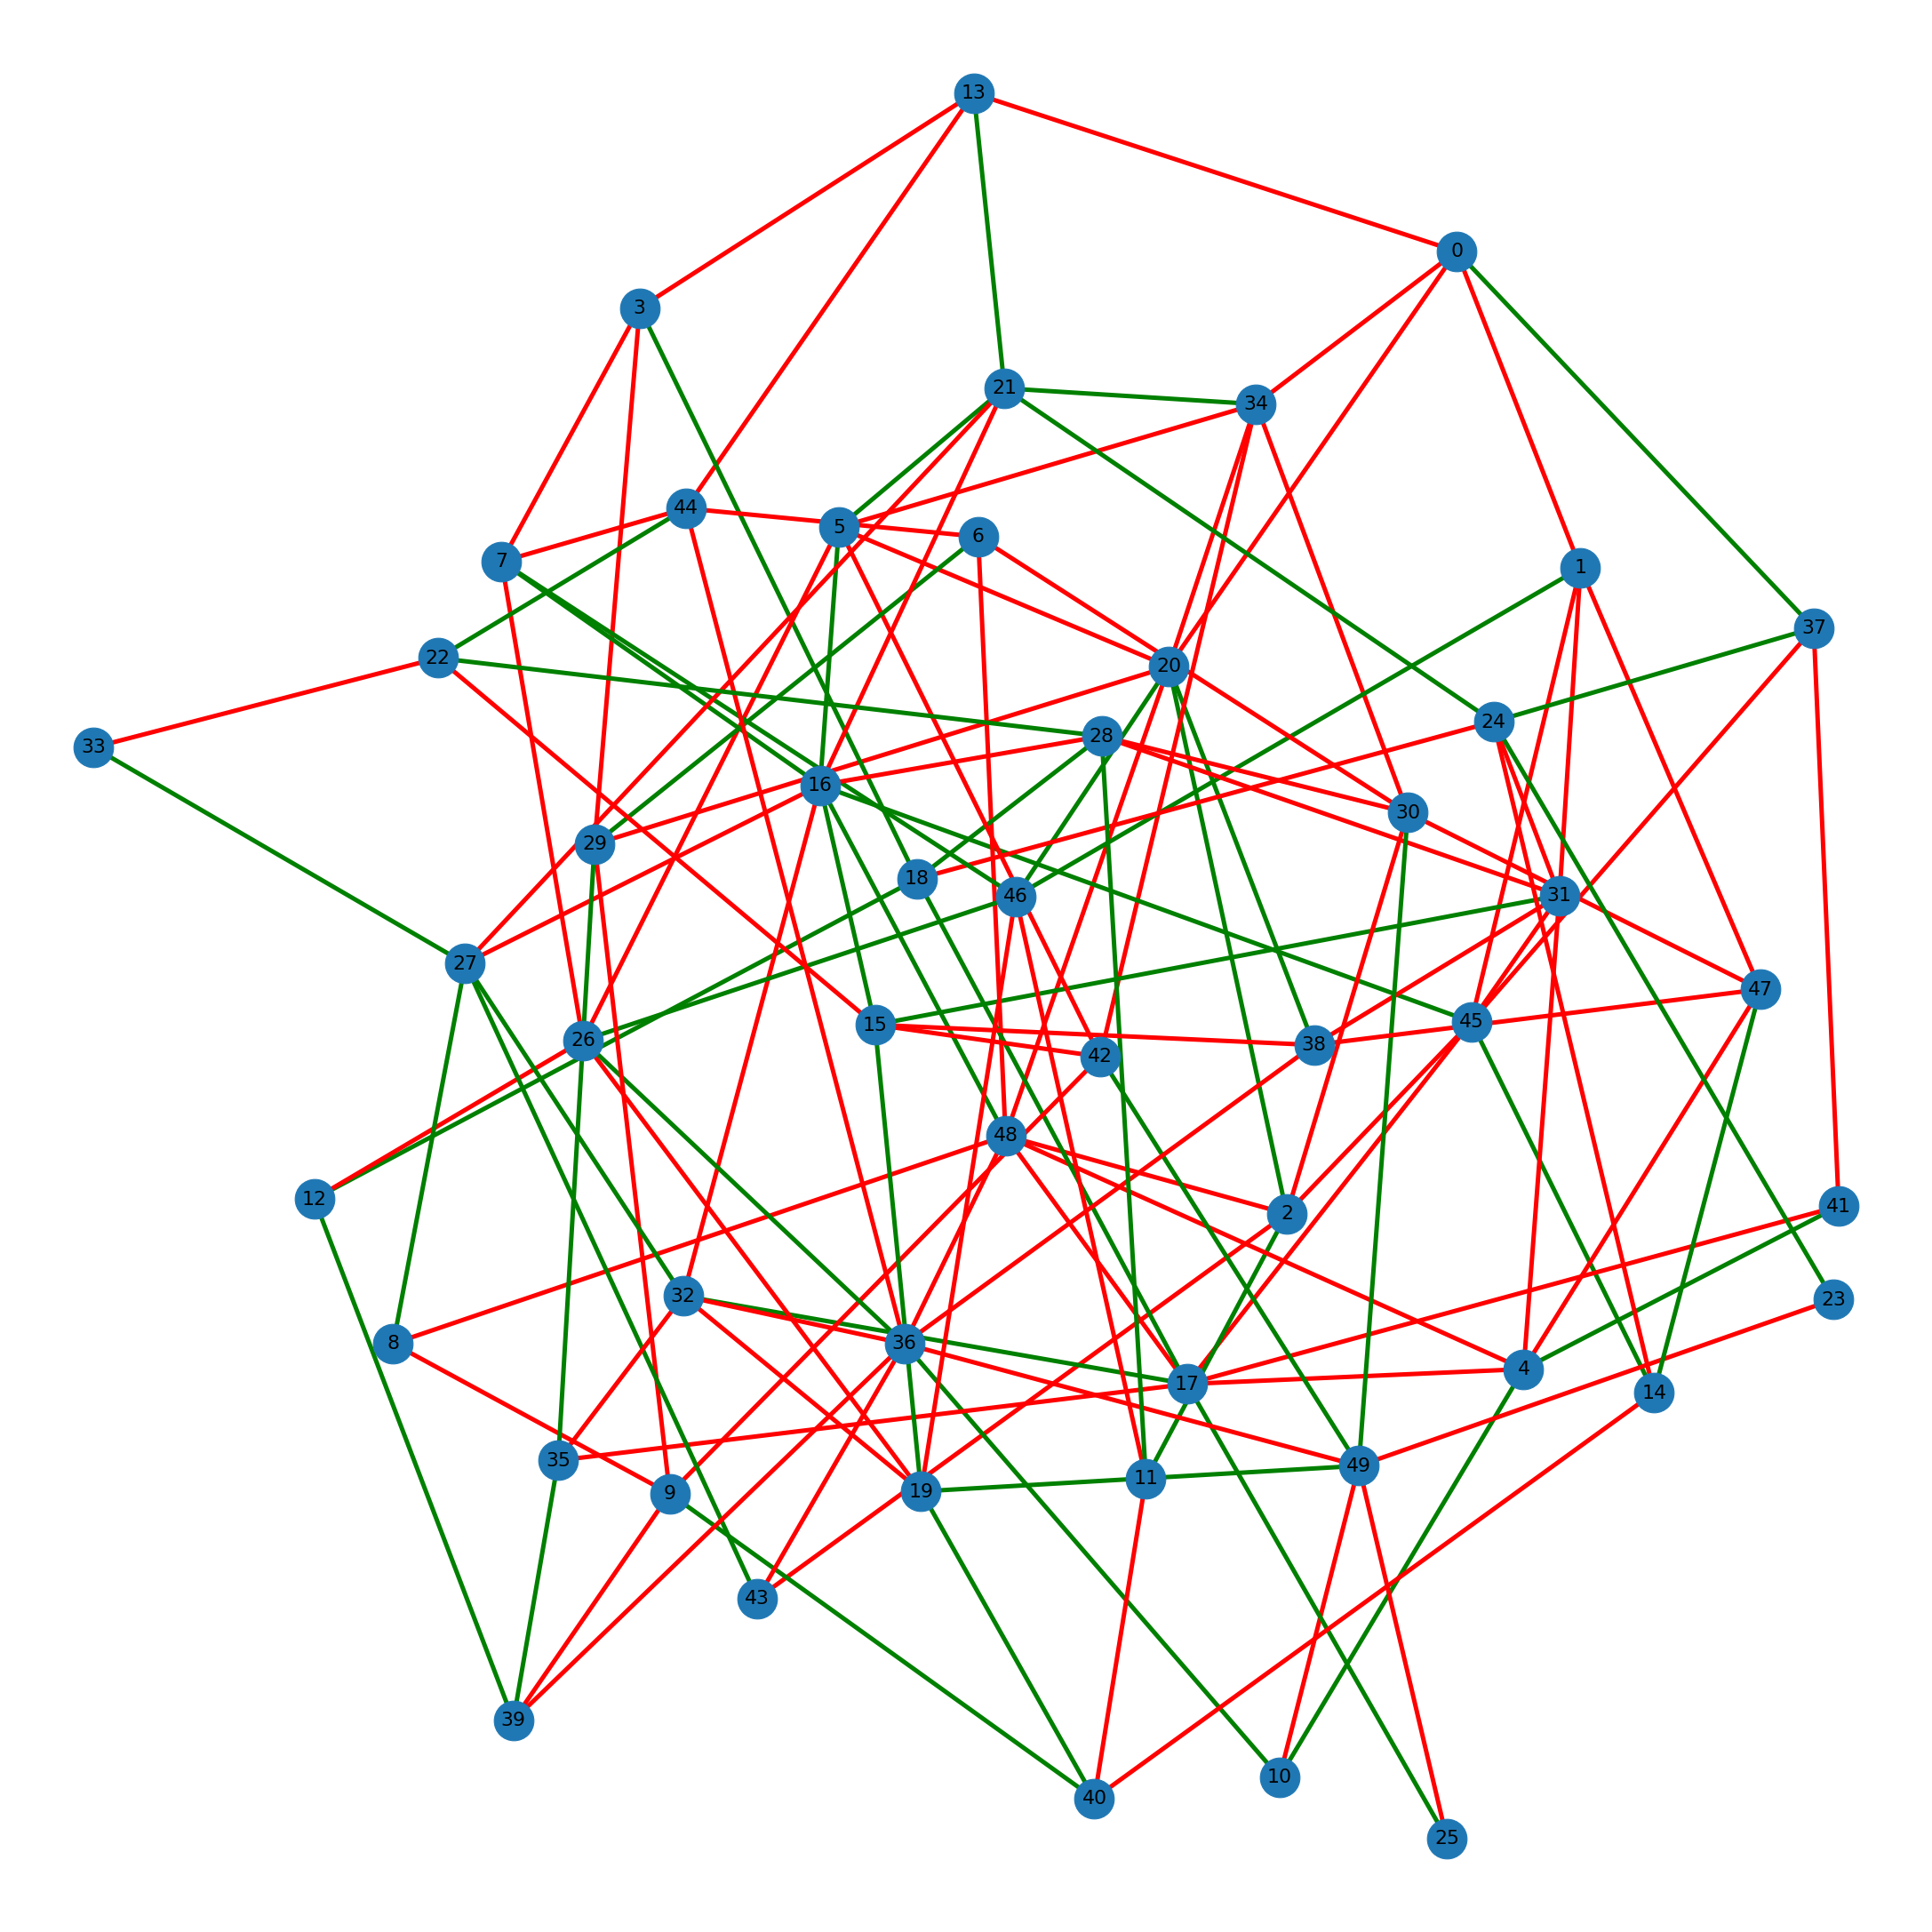

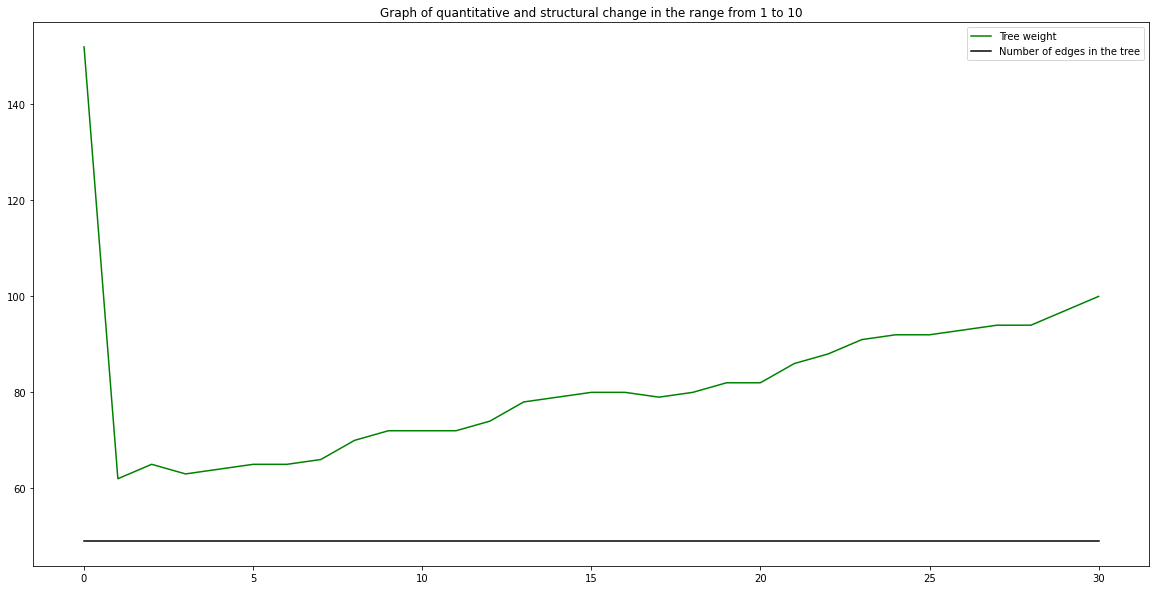

In [14]:
length_list4 = [length]
count_list4 = [count]
task4 = G
for i in range(30):
    task4 = change_edges(task4, minimum = 1, maximum = 10)
    tree = take_tree(task4)
    l, c = take_tree_len(task4, tree)
    length_list4.append(l)
    count_list4.append(c)
tree_draw(task4, tree_edges=tree)

plt.figure(1, (20, 10))
plt.plot(length_list4, label = 'Tree weight',  color = "green")
plt.plot(count_list4, label = 'Number of edges in the tree', color = "black")
plt.title('Graph of quantitative and structural change in the range from 1 to 10')
plt.legend()
plt.show()

As you can see, the number of edges has not changed. The total weight has increased, because the new range is larger than in the previous task.